#  SIGN-LANGUAGE

![](https://assets.skyfilabs.com/images/blog/sign-language-translator.webp)

#### Sign languages (also known as signed languages) are languages that utilize the visual-manual methodology to pass on importance. Language is communicated through the manual sign stream in the mix with non-manual components. The dataset called (Sign Language MNIST) is of the American Sign Language hand gestures representing letters. This is a multi-class classification problem with 24 classes of letters ( excluding J and Z which require motion).  ####

##### This dataset is licensed under the  CC0 1.0 Universal Public Domain Dedication license.#####




In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ssn
import numpy as np
import keras
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout, MaxPool2D
from keras.models import Sequential

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from pandas_profiling import ProfileReport
import time
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import ImageDataGenerator


base={0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',
      14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}


# Using tensorflow as backend

Using TensorFlow backend.


In [3]:
train_data= pd.read_csv('../input/sign-language-mnist/sign_mnist_train.csv')
test_data= pd.read_csv('../input/sign-language-mnist/sign_mnist_test.csv')


In [4]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [6]:
train_labels=np.array(train_data['label'])
del train_data['label']



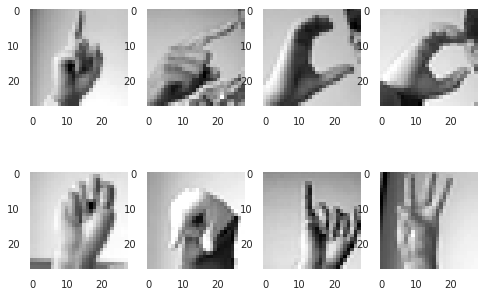

In [7]:
x_train= train_data.values
x_train= x_train.reshape(-1,28,28,1)


f, ax = plt.subplots(2,4)

index=0

for i in range(2):
    for j in range(4):
        ax[i,j].imshow(x_train[index].reshape(28,28),cmap='gray')
        index+=1

        


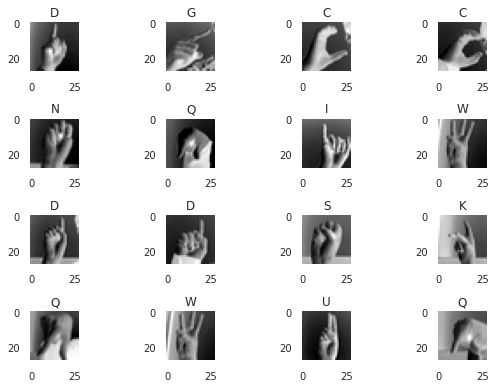

In [8]:
#Images after normalising the inputs


x_train=x_train/255.

w, mx= plt.subplots(4,4)

k=0
for i in range(4):
    for j in range(4):
        mx[i,j].imshow(x_train[k].reshape(28,28),cmap='binary')
        mx[i,j].set_title(base[train_labels[k]])
        
        k+=1
        
    plt.tight_layout()

In [9]:
print("The total number of labels are {}".format(len(set(train_labels))))

The total number of labels are 24


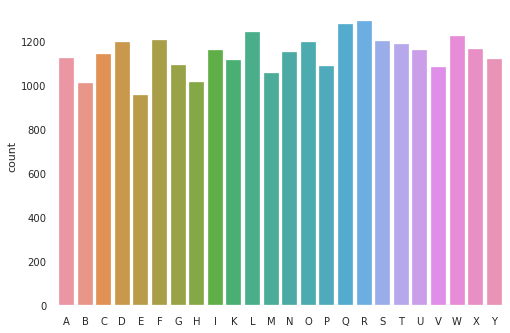

In [10]:
train_labels_char=[]
for i in range(len(train_labels)):
    train_labels_char.append(base[(train_labels[i])])

train_labels_char=sorted(train_labels_char)

ssn.countplot(train_labels_char)

#### There is almost the similar count in all the labels. It means that our training data is varied properly among the labels.

In [11]:
test_labels=test_data['label']

y=test_data['label']

del test_data['label']


In [12]:
test_data=test_data.values
test_data=test_data.reshape(-1,28,28,1)

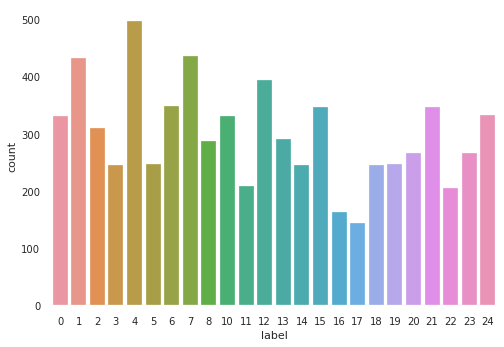

In [13]:
#Checking the uniformity of testing labels

ssn.countplot(test_labels)

The number of variables in x_test is 7172


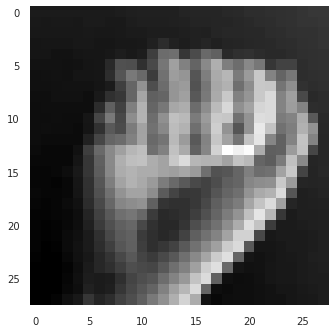

In [14]:
import random
x_test=test_data
x_test=x_test/255.
x_test=x_test.reshape(-1,28,28,1)
print("The number of variables in x_test is {}".format(len(x_test)))
plt.imshow(x_test[random.choice(range(1,len(x_test)))].reshape(28,28),cmap='binary')

In [15]:
#To overcome overfitting problem, I am trying to increase the training data by using ImageDataGenerator from the existing training data.

dgen= ImageDataGenerator(featurewise_center=False,samplewise_center=False,featurewise_std_normalization=False,
                        samplewise_std_normalization=False,zca_whitening=False, rotation_range=10, zoom_range=0.1,
                        width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=False, vertical_flip=False)
dgen.fit(x_train)

# Training the Model

In [16]:

model=Sequential()


#Initial Conv2D layer with 64 filters with filter sizes of 3X3
model.add(Conv2D(64,(3,3),strides=2,padding='same',activation='elu',input_shape=(28,28,1)))
#Although RELU is common, I am experimenting with ELU. ELU is similar to RELU except negative inputs.

model.add(MaxPool2D((2,2),strides=2,padding='same'))

#Second Conv2D layer with 50 filters and 3X3 filter size

model.add(Conv2D(50,(3,3),strides=1,padding='same',activation='elu'))

#Third Conv2D layer with 128 filters and 3X3 filter size

model.add(Conv2D(128,(3,3),strides=1,padding='same',activation='elu'))

model.add(Flatten())

#Output Layer
model.add(Dense(units=24,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 50)          28850     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         57728     
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 24)                150552    
Total params: 237,770
Trainable params: 237,770
Non-trainable params: 0
__________________________________________________

In [17]:
#Using TPU v3-8
# x_train, train_labels, x_test, test_labels
l_binarizer=LabelBinarizer()
train_labels= l_binarizer.fit_transform(train_labels)
test_labels= l_binarizer.fit_transform(test_labels)



In [18]:
start_time=time.time()
history=model.fit(dgen.flow(x_train,train_labels,batch_size=50),epochs=20, validation_data=(x_test,test_labels))
end_time=time.time()

Epoch 1/20
550/550 [==============================] - 19s 35ms/step - loss: 1.4370 - accuracy: 0.5538 - val_loss: 0.5118 - val_accuracy: 0.8148
Epoch 2/20
550/550 [==============================] - 19s 34ms/step - loss: 0.7178 - accuracy: 0.7655 - val_loss: 0.4595 - val_accuracy: 0.8489
Epoch 3/20
550/550 [==============================] - 19s 34ms/step - loss: 0.5151 - accuracy: 0.8326 - val_loss: 0.2545 - val_accuracy: 0.9133
Epoch 4/20
550/550 [==============================] - 19s 35ms/step - loss: 0.4255 - accuracy: 0.8614 - val_loss: 0.2303 - val_accuracy: 0.9257
Epoch 5/20
550/550 [==============================] - 18s 33ms/step - loss: 0.3166 - accuracy: 0.8956 - val_loss: 0.1657 - val_accuracy: 0.9407
Epoch 6/20
550/550 [==============================] - 18s 33ms/step - loss: 0.2505 - accuracy: 0.9167 - val_loss: 0.1577 - val_accuracy: 0.9525
Epoch 7/20
550/550 [==============================] - 19s 35ms/step - loss: 0.2151 - accuracy: 0.9289 - val_loss: 0.1701 - val_accuracy:

In [19]:
mins= int(round(end_time-start_time,2)//60)
seconds= round(round(end_time-start_time,2)%60)
print("The time taken to build the model is {} minutes {} seconds".format(mins,seconds))

The time taken to build the model is 6 minutes 18 seconds


In [20]:
print("The accuracy of the model is ",model.evaluate(x_test,test_labels)[1]*100,'%')

225/225 [==============================] - 1s 6ms/step - loss: 0.1164 - accuracy: 0.9734
The accuracy of the model is  97.33686447143555 %


In [21]:
training_accuracy=history.history['accuracy']
training_loss= history.history['loss']
validation_accuracy=history.history['val_accuracy']
validation_loss= history.history['val_loss']
epochs=list(range(1,21))


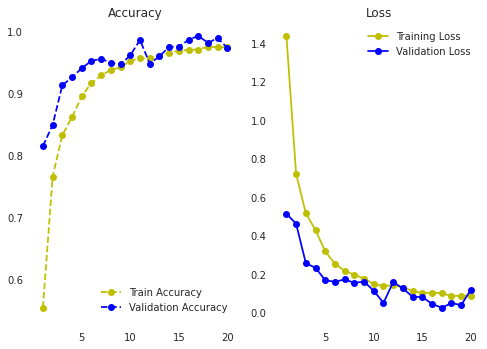

In [22]:
#Accuracy Part

m, ax= plt.subplots(1,2)
ax[0].plot(epochs,training_accuracy,'yo--',label='Train Accuracy')
ax[0].plot(epochs, validation_accuracy,'bo--',label='Validation Accuracy')
ax[0].set_title('Accuracy')
ax[0].legend()


#Loss Part

ax[1].plot(epochs, training_loss, 'yo-',label='Training Loss')
ax[1].plot(epochs, validation_loss,'bo-',label='Validation Loss')
ax[1].set_title("Loss")
ax[1].legend()

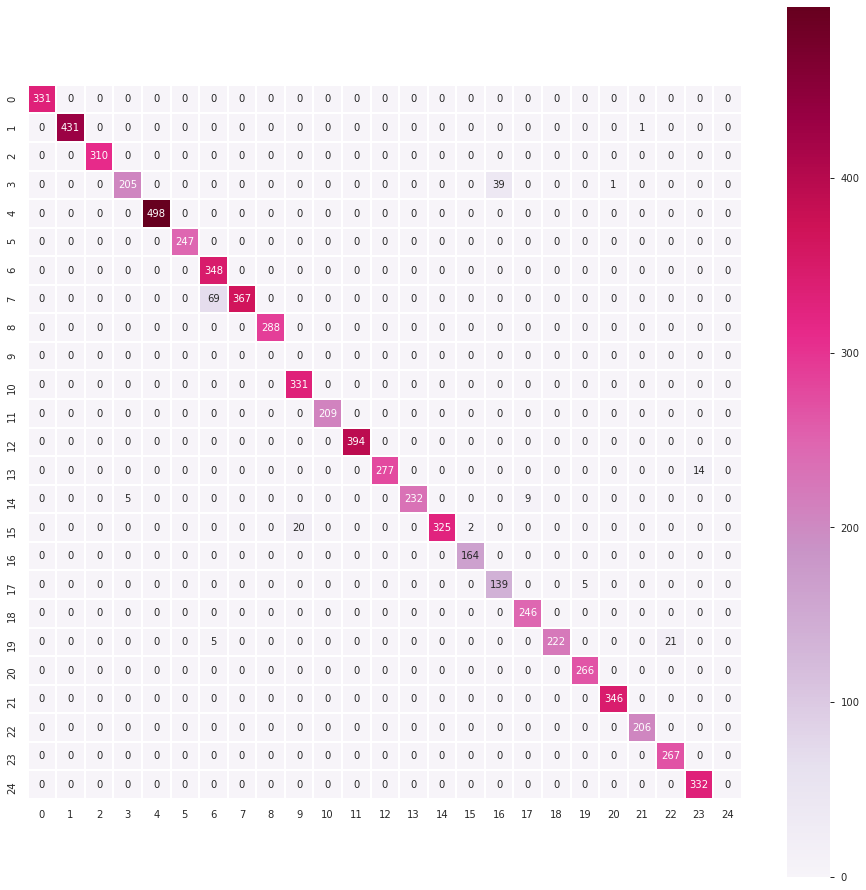

In [23]:
pd= model.predict_classes(x_test)
plt.figure(figsize=(16,16))
cm= confusion_matrix(y,pd)
ssn.heatmap(cm, fmt="d",cmap='PuRd',annot=True,linewidths=1,square=True)

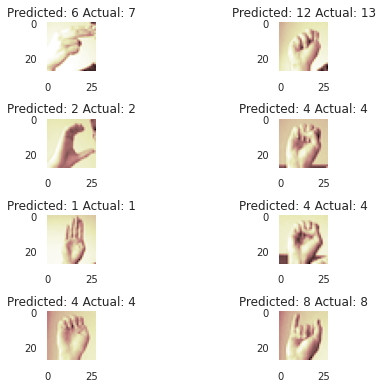

In [24]:
total=0

f, mx= plt.subplots(4,2)
k=300
for i in range(4):
    for j in range(2):
        mx[i,j].imshow(x_test[k].reshape(28,28),cmap='pink')
        mx[i,j].set_title("Predicted: {} Actual: {}".format(pd[k],y[k]))
        if pd[k]==y[k]:
            total+=1
        k+=1
        
    plt.tight_layout()


In [25]:
print("Total correctly classified results from random k is {} out of 8".format(total))

Total correctly classified results from random k is 6 out of 8
